In [316]:
import torch
import matplotlib.pyplot as plt
import sys
import os
import numpy as np
from itertools import chain
import json

In [318]:
global_model = Model()
local_model = Model()

In [319]:
global_path = '../checkpoint/mnist_classification_cnum10_dist6_skew0.7_seed0/global'
local_path = '../checkpoint/mnist_classification_cnum10_dist6_skew0.7_seed0/local'

In [320]:
with open('../fedtask/mnist_classification_cnum10_dist6_skew0.7_seed0/data.json', 'r', encoding='utf-8') as f:
    task_info = json.load(f)

In [321]:
task_info

{'store': 'IDX',
 'client_names': ['Client00',
  'Client01',
  'Client02',
  'Client03',
  'Client04',
  'Client05',
  'Client06',
  'Client07',
  'Client08',
  'Client09'],
 'dtest': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  1

In [322]:
# sample_size = []
# for i in range(10):
#     print(f'Client{i+1} sample size: ', len(task_info[f'Client0{i+1}']['dtrain']))
#     sample_size.append(len(task_info[f'Client0{i+1}']['dtrain']))

In [323]:
# if not os.path.exists('image'):
#     os.makedirs('image', exist_ok=True)
# if not os.path.exists(os.path.join('image','iid')):
#     os.makedirs(os.path.join('image','iid'), exist_ok=True)

# plot_grad_list = []
# grad_list = []
# for i in range(50):
#     global_model.load_state_dict(torch.load(os.path.join(global_path, f"round{i}/global_model.pt")))
#     for j in range(10):
#         local_model.load_state_dict(torch.load(os.path.join(local_path, f'round{i+1}/client{j}_model.pt')))
        
#         grad_weight = global_model.state_dict()['fc3.weight'] - local_model.state_dict()['fc3.weight']
#         grad_bias = global_model.state_dict()['fc3.bias'] - local_model.state_dict()['fc3.bias']
#         grad_tensor = torch.concat((torch.flatten(grad_weight), torch.flatten(grad_bias)))
#         grad_list.append(grad_tensor)
#     grad_list = [grad.tolist() for grad in grad_list]
#     grad_list = list(chain.from_iterable(grad_list))
#     plot_grad_list.append(grad_list)
#     index = np.arange(2010 * 10)
#     plt.figure(figsize=(20, 10)) 
#     plt.bar(index, grad_list, color='red')
#     plt.title(f"Gradient per client in round {i+1}")
#     # plt.show()
#     plt.savefig(f'image/iid/GradAtStep{i}.jpg')
#     grad_list = []
    

In [324]:
import pickle

In [325]:
const_lambda_array = np.zeros([10,])
for i in range(50):
    with open(f'../SV_result/mnist_classification_cnum10_dist6_skew0.7_seed0/const_lambda/Round{i+1}.npy', 'rb') as f:
        const_lambda = pickle.load(f)
        list_const = [itm / pow(i+1, 3) for itm in const_lambda[:-1]]
        const_lambda_array += list_const

In [326]:
opt_lambda_array = np.zeros([10,])
for i in range(50):
    with open(f'../SV_result/mnist_classification_cnum10_dist6_skew0.7_seed0/optimal_lambda/Round{i+1}.npy', 'rb') as f:
        opt_lambda = pickle.load(f)
        list_opt = [itm / pow(i+1, 3) for itm in opt_lambda[:-1]]
        opt_lambda_array += list_opt

In [327]:
exact_array = np.zeros([10,])
for i in range(50):
    with open(f'../SV_result/mnist_classification_cnum10_dist6_skew0.7_seed0/exact/Round{i+1}.npy', 'rb') as f:
        exact = pickle.load(f)
        list_exact = [itm / pow(i+1, 3) for itm in exact[:-1]]
        exact_array += list_exact

In [328]:
const_lambda_array = const_lambda_array / sum(const_lambda_array)
opt_lambda_array = opt_lambda_array / sum(opt_lambda_array)
exact_array = exact_array / sum(exact_array)

In [329]:
# sample_size = [size / sum(sample_size) for size in sample_size]

In [330]:
# plot_grad_list = np.array(plot_grad_list)
# plot_grad_list.shape

In [331]:
# sum_grad_list = np.zeros((10,))
# for i in range(50):
#     split_array = np.array_split(plot_grad_list[i], 10)
#     sum_list = [sum(abs(item)) for item in split_array]
#     sum_list = [item / pow(i+1,2) for item in sum_list]
#     sum_grad_list += sum_list 
    

In [332]:
# sum_grad_list

In [333]:
# sum_grad_list = sum_grad_list / sum(sum_grad_list)
# sum_grad_list

In [334]:
data_size = [0.21976831, 0.22337278, 0.00722977, 0.21047587, 0.02696058, 0.1707434 , 0.00227102, 0.01214685, 0.0327944 , 0.09423702]

In [335]:
data_size, c_array, opt_array, exact_array = zip(*sorted(zip(data_size, const_lambda_array, opt_lambda_array, exact_array), reverse=True))
c_array

(0.1483955111484823,
 0.14810339765561692,
 0.147495933662305,
 0.14671685145776694,
 0.13754444621462922,
 0.204766589047608,
 0.11040679093616518,
 0.007876860828469924,
 -0.01777940586096904,
 -0.03352697509007439)

In [336]:
data_size

(0.22337278,
 0.21976831,
 0.21047587,
 0.1707434,
 0.09423702,
 0.0327944,
 0.02696058,
 0.01214685,
 0.00722977,
 0.00227102)

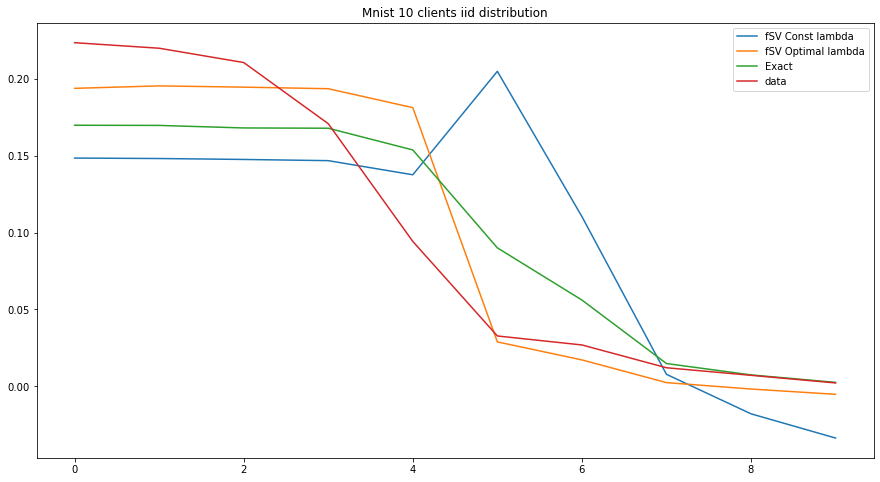

In [337]:
plt.figure(figsize=(15, 8))
plt.plot(c_array, label="fSV Const lambda")
plt.plot(opt_array, label="fSV Optimal lambda")
plt.plot(exact_array, label="Exact")
plt.plot(data_size, label='data')
# plt.plot(sum_grad_list, label='grad')
plt.title("Mnist 10 clients iid distribution")
plt.legend()
plt.show()